# Modelo de Classificação Hierárquica


---


[documentação](https://scikit-learn.org/stable/index.html) <br>
[documentação](https://docs.scipy.org/doc/scipy/index.html) <br>
dataset: [fonte](https://archive.ics.uci.edu/ml/datasets/wine)

---

>[Modelo de Classificação Hierárquica](#scrollTo=QoBv84MIUa-h)

>>[1. Vamos começar por importar os packages e o dataset](#scrollTo=HO6jdFDmldaU)

>>[2. Vamos explorar o dataset](#scrollTo=2S0UrVDEf8E-)

>>[3. Vamos visualizar a informação](#scrollTo=lYnaR0LYO-Sg)

>>[4. Vamos aplicar o modelo de Classificação Hierárquica às variáveis](#scrollTo=BKzodGb8R7t9)

>>[5. Vamos aplicar o modelo de Classificação Hierárquica às observações](#scrollTo=VN3ei0tZ9W0o)



## 1.&nbsp;Vamos começar por importar os packages e o dataset

In [2]:
# packages gerais
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# vamos importar o dataset das iris
wine = load_wine()
X = pd.DataFrame(wine.data, columns = wine.feature_names)


## 2.&nbsp;Vamos explorar o dataset

In [2]:
X.head(200)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
# exploração inicial
# X.head()
# X.info()
# X.shape
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 3.&nbsp;Vamos visualizar a informação


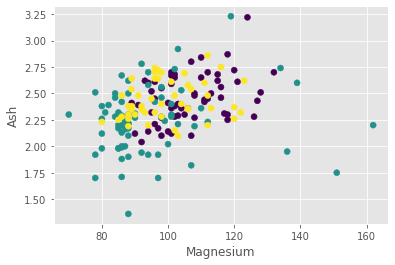

In [3]:
# importamos o matplotlib.pyplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#definimos as variáveis que queremos visualizar (magnesium e ash)
x_variable = X["magnesium"]
y_variable = X["ash"]
plt.scatter(x_variable, y_variable, c = wine.target)
plt.xlabel("Magnesium")
plt.ylabel('Ash')
plt.show()

## 4.&nbsp;Vamos aplicar o modelo de Classificação Hierárquica às variáveis

In [4]:
# importamos o modelo
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# vamos utilizar a transposta (para termos as variáveis como linhas)
X_t = X.values.transpose()

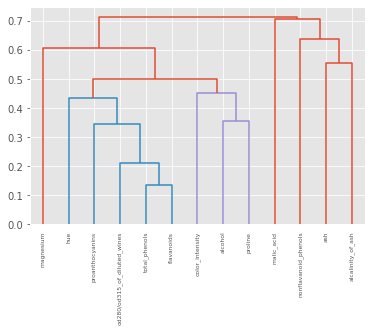

In [6]:
# aplicamos o modelo, escolhendo o método e a medida de distância
clusters_sl = linkage(X_t, method = 'single', metric = 'correlation')
dendrogram(clusters_sl,
           labels = X.columns,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

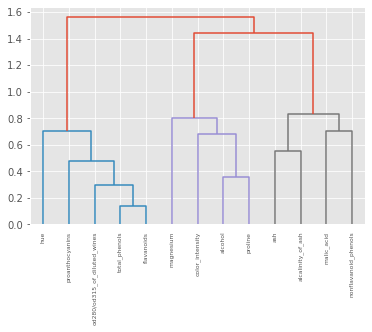

In [7]:
clusters_cl = linkage(X_t, method = 'complete', metric = 'correlation')
dendrogram(clusters_cl,
           labels = X.columns,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

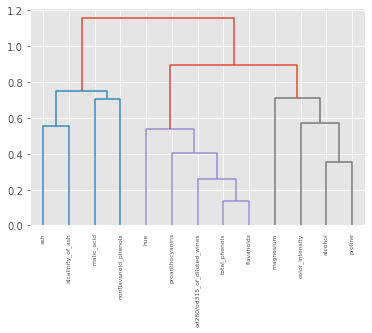

In [8]:

clusters_avg = linkage(X_t, method = 'average', metric = 'correlation')
dendrogram(clusters_avg,
           labels = X.columns,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

In [9]:
# Se quisermos ver as labels
labels = fcluster(clusters_avg, 0.8, criterion = 'distance')
labels

array([3, 1, 1, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3], dtype=int32)

## 5.&nbsp;Vamos aplicar o modelo de Classificação Hierárquica às observações

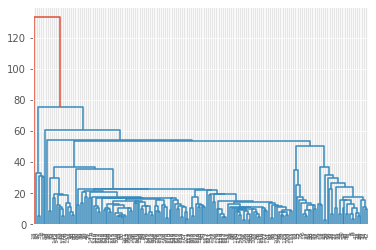

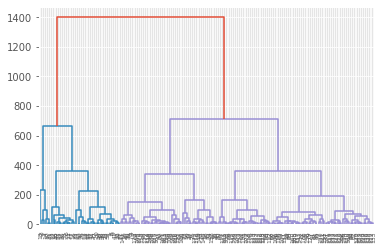

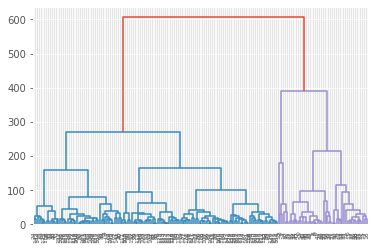

In [11]:
# importamos o modelo
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# aplicamos o modelo, escolhendo o método e a medida de distância
clusters_sl = linkage(X, method = 'single', metric = 'euclidean')
dendrogram(clusters_sl,
           labels = X.index,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

clusters_cl = linkage(X, method = 'complete', metric = 'euclidean')
dendrogram(clusters_cl,
           labels = X.index,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

clusters_avg = linkage(X, method = 'average', metric = 'euclidean')
dendrogram(clusters_avg,
           labels = X.index,
           leaf_rotation = 90,
           leaf_font_size = 6)
plt.show()

In [12]:
# Se quisermos ver as labels
labels = fcluster(clusters_avg, 350, criterion = 'distance')
labels

# vamos comparar com as classes
df_labels = pd.DataFrame({'labels': labels,
                         'classes': wine.target})
pd.crosstab(df_labels['labels'], df_labels['classes'])

classes,0,1,2
labels,,,
1,13,69,48
2,6,0,0
3,40,2,0
